<a href="https://colab.research.google.com/github/VMadhav007/ML/blob/main/olympics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd


In [ ]:
teams=pd.read_csv("teams.csv")
teams

,team,country,year,events,athletes,age,height,weight,medals,prev_medals,prev_3_medals
0,AFG,Afghanistan,1964,8,8,22.0,161.0,64.2,0,0.0,0.0
1,AFG,Afghanistan,1968,5,5,23.2,170.2,70.0,0,0.0,0.0
2,AFG,Afghanistan,1972,8,8,29.0,168.3,63.8,0,0.0,0.0
3,AFG,Afghanistan,1980,11,11,23.6,168.4,63.2,0,0.0,0.0
4,AFG,Afghanistan,2004,5,5,18.6,170.8,64.8,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
2139,ZIM,Zimbabwe,2000,19,26,25.0,179.0,71.1,0,0.0,0.0
2140,ZIM,Zimbabwe,2004,11,14,25.1,177.8,70.5,3,0.0,0.0
2141,ZIM,Zimbabwe,2008,15,16,26.1,171.9,63.7,4,3.0,1.0
2142,ZIM,Zimbabwe,2012,8,9,27.3,174.4,65.2,0,4.0,2.3


In [ ]:
teams=teams[["team","country","year","athletes","age","prev_medals","medals"]]

In [ ]:
import seaborn as sns

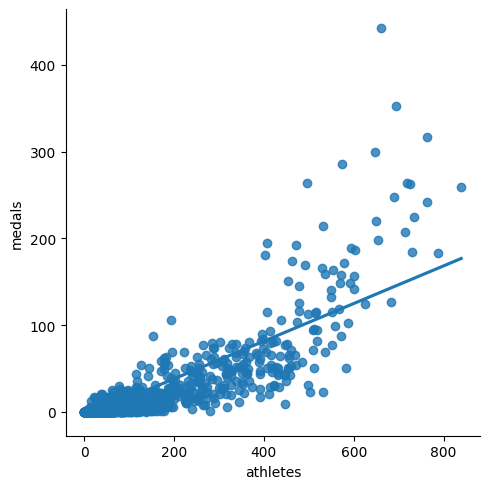

In [ ]:
sns.lmplot(x="athletes",y="medals",data=teams,fit_reg=True,ci=None)

In [ ]:
teams[teams.isnull().any(axis=1)]

,team,country,year,athletes,age,prev_medals,medals
19,ALB,Albania,1992,9,25.3,NaN,0
26,ALG,Algeria,1964,7,26.0,NaN,0
39,AND,Andorra,1976,3,28.3,NaN,0
50,ANG,Angola,1980,17,17.4,NaN,0
59,ANT,Antigua and Barbuda,1976,17,23.2,NaN,0
...,...,...,...,...,...,...,...
2092,VIN,Saint Vincent and the Grenadines,1988,6,20.5,NaN,0
2103,YAR,North Yemen,1984,3,27.7,NaN,0
2105,YEM,Yemen,1992,8,19.6,NaN,0
2112,YMD,South Yemen,1988,5,23.6,NaN,0


In [ ]:
teams=teams.dropna()
teams

,team,country,year,athletes,age,prev_medals,medals
0,AFG,Afghanistan,1964,8,22.0,0.0,0
1,AFG,Afghanistan,1968,5,23.2,0.0,0
2,AFG,Afghanistan,1972,8,29.0,0.0,0
3,AFG,Afghanistan,1980,11,23.6,0.0,0
4,AFG,Afghanistan,2004,5,18.6,0.0,0
...,...,...,...,...,...,...,...
2139,ZIM,Zimbabwe,2000,26,25.0,0.0,0
2140,ZIM,Zimbabwe,2004,14,25.1,0.0,3
2141,ZIM,Zimbabwe,2008,16,26.1,3.0,4
2142,ZIM,Zimbabwe,2012,9,27.3,4.0,0


In [ ]:
train=teams[teams["year"]<2012].copy()
test=teams[teams["year"]>=2012].copy()

In [ ]:
train.shape


(1609, 7)

In [ ]:
test.shape


(405, 7)

In [ ]:
from sklearn.linear_model import LinearRegression
reg =LinearRegression()

In [ ]:
predictor=["athletes","prev_medals"]
target="medals"

In [ ]:
reg.fit(train[predictor],train[target])

LinearRegression()

In [ ]:
predictions= reg.predict(test[predictor])

In [ ]:
predictions

array([-9.61221245e-01, -1.17633261e+00, -1.42503158e+00, -1.71184673e+00,
        2.15562926e+00,  3.91463636e+00, -1.71184673e+00, -1.85525431e+00,
        3.67563128e-01, -2.77770967e-01, -1.85525431e+00, -1.49673537e+00,
        4.67519911e+01,  2.87550937e+01,  4.58450091e+00,  2.54773581e+00,
       -1.85525431e+00, -1.64014295e+00, -1.85525431e+00, -1.85525431e+00,
        1.46556876e+02,  1.20571799e+02,  6.56314795e+00,  3.95275254e+00,
        7.34283247e+00,  1.03117468e+01,  5.19171882e+00,  3.58517645e+00,
       -1.64014295e+00, -1.64014295e+00, -1.56843916e+00, -1.20992022e+00,
       -1.71184673e+00, -1.42503158e+00,  1.17929959e+01,  1.00049298e+01,
       -1.78355052e+00, -1.71184673e+00, -1.56843916e+00, -1.56843916e+00,
       -1.99866189e+00, -1.99866189e+00, -1.56843916e+00, -1.35332779e+00,
       -1.92695810e+00, -1.92695810e+00,  3.28912706e+01,  2.53042547e+01,
       -1.78355052e+00, -1.28162400e+00, -1.85525431e+00, -3.87590939e-01,
        7.83480779e+01,  

In [ ]:
test["predictions"]=predictions
test

,team,country,year,athletes,age,prev_medals,medals,predictions
6,AFG,Afghanistan,2012,6,24.8,1.0,1,-0.961221
7,AFG,Afghanistan,2016,3,24.7,1.0,0,-1.176333
24,ALB,Albania,2012,10,25.7,0.0,0,-1.425032
25,ALB,Albania,2016,6,23.7,0.0,0,-1.711847
37,ALG,Algeria,2012,39,24.8,2.0,1,2.155629
...,...,...,...,...,...,...,...,...
2111,YEM,Yemen,2016,3,19.3,0.0,0,-1.926958
2131,ZAM,Zambia,2012,7,22.6,0.0,0,-1.640143
2132,ZAM,Zambia,2016,7,24.1,0.0,0,-1.640143
2142,ZIM,Zimbabwe,2012,9,27.3,4.0,0,1.505767


In [ ]:
test.loc[test["predictions"]<0,"predictions"]=0
test

,team,country,year,athletes,age,prev_medals,medals,predictions
6,AFG,Afghanistan,2012,6,24.8,1.0,1,0.000000
7,AFG,Afghanistan,2016,3,24.7,1.0,0,0.000000
24,ALB,Albania,2012,10,25.7,0.0,0,0.000000
25,ALB,Albania,2016,6,23.7,0.0,0,0.000000
37,ALG,Algeria,2012,39,24.8,2.0,1,2.155629
...,...,...,...,...,...,...,...,...
2111,YEM,Yemen,2016,3,19.3,0.0,0,0.000000
2131,ZAM,Zambia,2012,7,22.6,0.0,0,0.000000
2132,ZAM,Zambia,2016,7,24.1,0.0,0,0.000000
2142,ZIM,Zimbabwe,2012,9,27.3,4.0,0,1.505767


In [ ]:
test["predictions"]=test["predictions"].round()

In [ ]:
test

,team,country,year,athletes,age,prev_medals,medals,predictions
6,AFG,Afghanistan,2012,6,24.8,1.0,1,0.0
7,AFG,Afghanistan,2016,3,24.7,1.0,0,0.0
24,ALB,Albania,2012,10,25.7,0.0,0,0.0
25,ALB,Albania,2016,6,23.7,0.0,0,0.0
37,ALG,Algeria,2012,39,24.8,2.0,1,2.0
...,...,...,...,...,...,...,...,...
2111,YEM,Yemen,2016,3,19.3,0.0,0,0.0
2131,ZAM,Zambia,2012,7,22.6,0.0,0,0.0
2132,ZAM,Zambia,2016,7,24.1,0.0,0,0.0
2142,ZIM,Zimbabwe,2012,9,27.3,4.0,0,2.0


In [ ]:
from sklearn.metrics import mean_absolute_error
error=mean_absolute_error(test["medals"],test["predictions"])
error

3.2987654320987656

In [ ]:
teams.describe()["medals"]#usually the error must be less than the std else some error in considering the predictors


,medals
count,2014.000000
mean,10.990070
std,33.627528
min,0.000000
25%,0.000000
50%,0.000000
75%,5.000000
max,442.000000


In [ ]:
test[test["team"]=="USA"]

,team,country,year,athletes,age,prev_medals,medals,predictions
2053,USA,United States,2012,689,26.7,317.0,248,285.0
2054,USA,United States,2016,719,26.4,248.0,264,236.0


In [ ]:
test[test["team"]=="IND"]

,team,country,year,athletes,age,prev_medals,medals,predictions
907,IND,India,2012,95,26.0,3.0,6,7.0
908,IND,India,2016,130,26.1,6.0,2,12.0


In [ ]:
errors=(test["medals"]-test["predictions"]).abs()
errors

,0
6,1.0
7,0.0
24,0.0
25,0.0
37,1.0
...,...
2111,0.0
2131,0.0
2132,0.0
2142,2.0


In [ ]:
errors_by_team=errors.groupby(test["team"]).mean()
errors_by_team

,0
team,
AFG,0.5
ALB,0.0
ALG,1.5
AND,0.0
ANG,0.0
...,...
VIE,1.0
VIN,0.0
YEM,0.0


In [ ]:
medals_by_team=teams.groupby("team")["medals"].mean()
error_ratio=medals_by_team/errors_by_team
error_ratio

,0
team,
AFG,0.500000
AHO,NaN
ALB,NaN
ALG,0.944444
AND,NaN
...,...
YAR,NaN
YEM,NaN
YUG,NaN


,0
team,
AFG,0.500000
ALG,0.944444
ARG,0.879121
ARM,1.866667
AUS,2.206349
...,...
UZB,1.240000
VEN,0.265306
VIE,0.500000


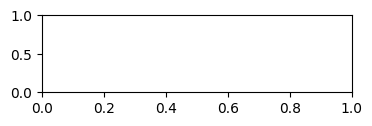

In [ ]:
error_ratio[~pd.isnull(error_ratio)]